In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pandas.plotting import register_matplotlib_converters


In [3]:
%matplotlib inline

In [4]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [5]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments)

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




In [95]:
describe_bild = df_bild.describe()

In [99]:
describe_bild

,articles_counts,day,lesbarkeit,month,polarity,subjectivity,thread_counts,word_counts,year
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.0,98.000000,98.0
mean,1.0,17.142857,43.896531,9.673469,0.036057,0.123487,0.0,307.826531,2019.0
std,0.0,6.013730,14.278916,3.248395,0.259439,0.168485,0.0,225.784179,0.0
min,1.0,12.000000,5.300000,1.000000,-1.000000,0.000000,0.0,26.000000,2019.0
25%,1.0,12.000000,35.382500,10.000000,-0.090265,0.003125,0.0,120.500000,2019.0
50%,1.0,15.000000,44.170000,11.000000,0.048237,0.072556,0.0,281.500000,2019.0
75%,1.0,21.000000,53.387500,12.000000,0.171275,0.166667,0.0,442.000000,2019.0
max,1.0,30.000000,72.530000,12.000000,1.000000,1.000000,0.0,1037.000000,2019.0


In [103]:
describe_bild[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,98.0,98.000000,98.000000,98.000000,98.0,98.000000
mean,1.0,43.896531,0.036057,0.123487,0.0,307.826531
std,0.0,14.278916,0.259439,0.168485,0.0,225.784179
min,1.0,5.300000,-1.000000,0.000000,0.0,26.000000
25%,1.0,35.382500,-0.090265,0.003125,0.0,120.500000
50%,1.0,44.170000,0.048237,0.072556,0.0,281.500000
75%,1.0,53.387500,0.171275,0.166667,0.0,442.000000
max,1.0,72.530000,1.000000,1.000000,0.0,1037.000000


In [105]:
describe_spiegel = df_spiegel.describe()


In [107]:
describe_spiegel[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,864.0,864.000000,864.000000,864.000000,864.000000,864.000000
mean,1.0,50.094271,0.060070,0.086003,105.464120,581.077546
std,0.0,8.634257,0.109733,0.062545,143.695567,319.679220
min,1.0,12.200000,-0.370000,0.000000,0.000000,57.000000
25%,1.0,45.565000,-0.011112,0.041385,0.000000,349.000000
50%,1.0,50.460000,0.064199,0.080397,57.000000,498.000000
75%,1.0,56.050000,0.125118,0.123207,143.750000,776.500000
max,1.0,73.580000,0.428571,0.500000,1251.000000,3381.000000


In [106]:
describe_spiegel[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts', 'mean_comment_pol',	'min_comment_pol',	'max_comment_pol',	'median_comment_pol',	'mean_comment_subj',	'min_comment_subj',	'max_comment_subj',	'median_comment_subj']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts,mean_comment_pol,min_comment_pol,max_comment_pol,median_comment_pol,mean_comment_subj,min_comment_subj,max_comment_subj,median_comment_subj
count,864.0,864.000000,864.000000,864.000000,864.000000,864.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.0,625.000000,625.000000
mean,1.0,50.094271,0.060070,0.086003,105.464120,581.077546,0.085033,-0.812014,0.913965,0.042270,0.090023,0.0,0.781632,0.007137
std,0.0,8.634257,0.109733,0.062545,143.695567,319.679220,0.048396,0.251083,0.158485,0.051810,0.022671,0.0,0.250356,0.020701
min,1.0,12.200000,-0.370000,0.000000,0.000000,57.000000,-0.086380,-1.000000,0.287500,-0.050000,0.005128,0.0,0.066667,0.000000
25%,1.0,45.565000,-0.011112,0.041385,0.000000,349.000000,0.059195,-1.000000,0.875000,0.000000,0.076230,0.0,0.500000,0.000000
50%,1.0,50.460000,0.064199,0.080397,57.000000,498.000000,0.083858,-1.000000,1.000000,0.030000,0.089686,0.0,1.000000,0.000000
75%,1.0,56.050000,0.125118,0.123207,143.750000,776.500000,0.106311,-0.666667,1.000000,0.069722,0.102193,0.0,1.000000,0.000000
max,1.0,73.580000,0.428571,0.500000,1251.000000,3381.000000,0.343558,0.000000,1.000000,0.360714,0.214141,0.0,1.000000,0.191667


In [8]:
art_monatl = df_spiegel[["year","month","day","articles_counts"]]


In [70]:
g = art_monatl.groupby(['year','month'])['articles_counts'].sum()
g

year  month
2015  1          2
      2          2
      3          2
      4          1
      5          2
      6          4
      7          2
      8          3
      9         12
      10         7
      11        19
      12        13
2016  1          5
      2          8
      3         10
      4          6
      5          9
      6          4
      7          4
      8          9
      9         14
      10        11
      11        11
      12         8
2017  1          9
      2         18
      3         17
      4         10
      5         10
      6          9
      7         13
      8         12
      9         11
      10        13
      11        22
      12        12
2018  1          8
      2          7
      3         12
      4          6
      5          8
      6          9
      7          6
      8         15
      9         20
      10        10
      11        18
      12        16
2019  1         15
      2         22
      3         17
      4         21


In [71]:
# Anzahl Artikel pro Jahr und Monat
g.unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,2,2,2,1,2,4,2,3,12,7,19,13
2016,5,8,10,6,9,4,4,9,14,11,11,8
2017,9,18,17,10,10,9,13,12,11,13,22,12
2018,8,7,12,6,8,9,6,15,20,10,18,16
2019,15,22,17,21,30,39,26,28,111,27,43,26


In [73]:
g = pd.DataFrame(g)
g.reset_index(inplace=True)

Text(0.5, 1.0, 'Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019')

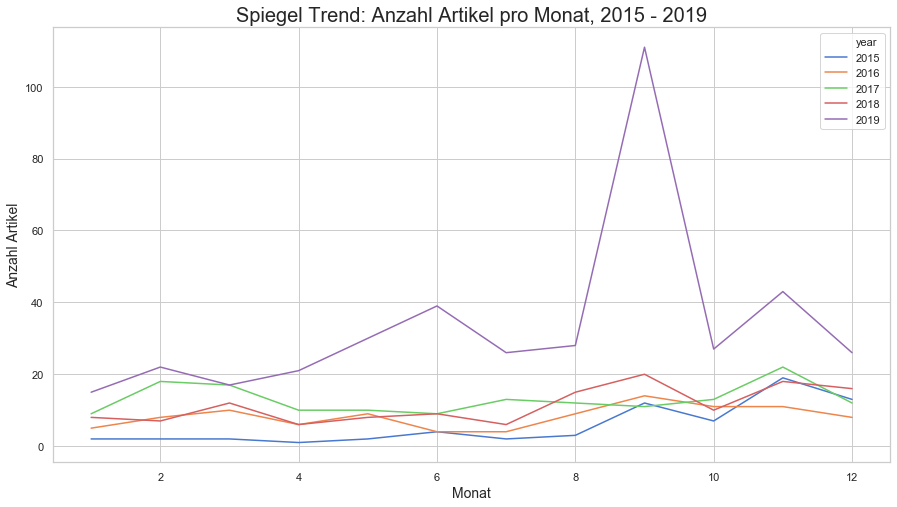

In [154]:
## in diesem Abschnitt werden die Variablen Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity und Anzahl Kommentare nach Jahr/Monat gruppiert und die Entwicklung mit lineplot dargestellt (Anzahl Wörter relevant?)
# Entwicklung Anzahl Artikel pro Jahr und Monat
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='articles_counts', hue='year', palette=color, data=g)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Artikel', size=14)
axes.set_title('Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019', size=20)

In [83]:
# Entwicklung Lesbarkeit pro Jahr/Monat
entw_l = df_spiegel.groupby(['year','month'])['lesbarkeit'].mean()
entw_l

year  month
2015  1        49.345000
      2        48.130000
      3        49.805000
      4        50.770000
      5        43.295000
      6        46.057500
      7        45.780000
      8        54.943333
      9        50.662500
      10       45.994286
      11       47.777895
      12       49.544615
2016  1        52.528000
      2        47.686250
      3        52.012000
      4        50.051667
      5        52.306667
      6        53.307500
      7        54.180000
      8        50.880000
      9        48.255000
      10       51.102727
      11       46.943636
      12       56.301250
2017  1        48.218889
      2        50.693889
      3        47.642353
      4        51.166000
      5        48.496000
      6        49.058889
      7        54.136154
      8        51.444167
      9        52.132727
      10       52.063846
      11       50.472273
      12       46.125833
2018  1        50.181250
      2        51.331429
      3        50.790000
      4      

In [84]:
entw_l = pd.DataFrame(entw_l)
entw_l.reset_index(inplace=True)

Text(0.5, 1.0, 'Entwicklung Lesbarkeitsindex Spiegel Artikel zwischen 2015-2019')

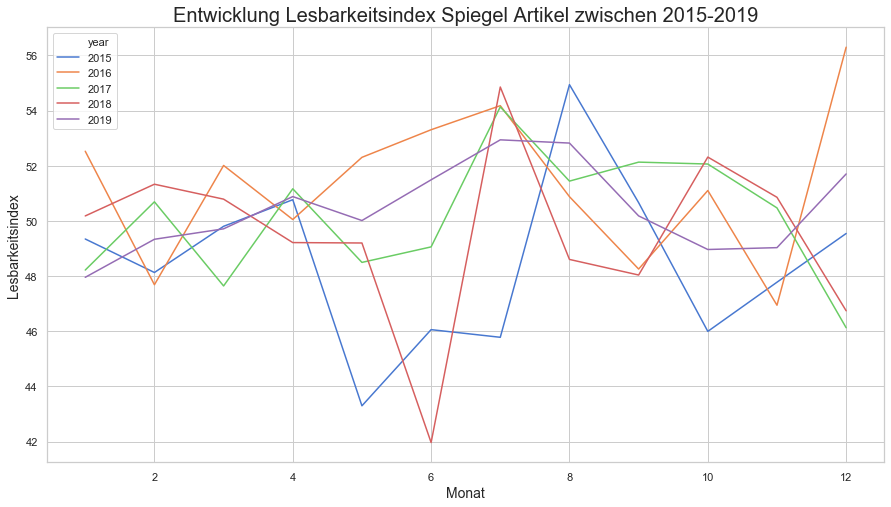

In [155]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='lesbarkeit', hue='year', palette=color, data=entw_l)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Lesbarkeitsindex', size=14)
axes.set_title('Entwicklung Lesbarkeitsindex Spiegel Artikel zwischen 2015-2019', size=20)


In [52]:
# Entwicklung Polarity pro Jahr/Monat
entw_p = df_spiegel.groupby(['year','month'])['polarity'].mean()
entw_p

year  month
2015  1       -0.004554
      2        0.094188
      3        0.003780
      4       -0.085500
      5        0.067071
      6        0.053095
      7       -0.064107
      8        0.059129
      9        0.069047
      10       0.020748
      11       0.065014
      12       0.116490
2016  1        0.174032
      2        0.043544
      3        0.014792
      4        0.033267
      5        0.004230
      6        0.102587
      7        0.039281
      8        0.165542
      9        0.149246
      10       0.097873
      11       0.028146
      12      -0.012808
2017  1        0.041791
      2        0.073547
      3        0.009334
      4        0.069899
      5        0.051094
      6        0.092930
      7        0.122906
      8        0.115221
      9        0.013760
      10       0.007381
      11       0.046854
      12       0.153284
2018  1        0.061802
      2        0.004995
      3        0.023558
      4        0.079177
      5        0.034973
    

In [53]:
entw_p = pd.DataFrame(entw_p)
entw_p.reset_index(inplace=True)

Text(0.5, 1.0, 'Entwicklung Polarity Spiegel Artikel zwischen 2015-2019')

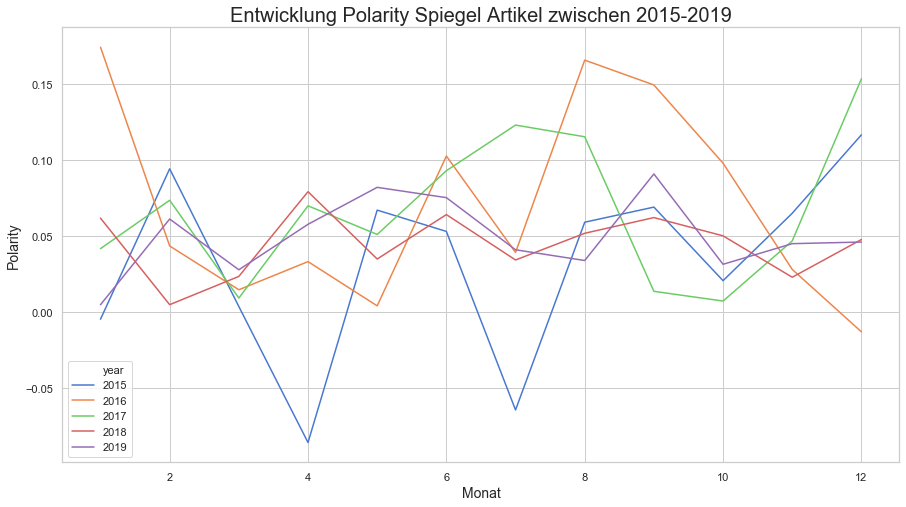

In [156]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='polarity', hue='year', palette=color, data=entw_p)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Polarity', size=14)
axes.set_title('Entwicklung Polarity Spiegel Artikel zwischen 2015-2019', size=20)


In [55]:
# Entwicklung Subjectivity pro Jahr/Monat
entw_s = df_spiegel.groupby(['year','month'])['subjectivity'].mean()
entw_s

year  month
2015  1        0.190655
      2        0.021739
      3        0.200579
      4        0.147083
      5        0.061616
      6        0.057143
      7        0.116667
      8        0.041611
      9        0.066989
      10       0.088975
      11       0.079386
      12       0.072464
2016  1        0.091848
      2        0.105650
      3        0.115541
      4        0.057129
      5        0.065545
      6        0.080830
      7        0.098938
      8        0.088932
      9        0.059153
      10       0.103427
      11       0.064496
      12       0.082317
2017  1        0.056179
      2        0.051469
      3        0.109183
      4        0.042465
      5        0.041780
      6        0.094911
      7        0.083693
      8        0.061116
      9        0.063360
      10       0.088439
      11       0.082187
      12       0.120312
2018  1        0.108341
      2        0.080121
      3        0.084773
      4        0.149207
      5        0.069396
    

In [56]:
entw_s = pd.DataFrame(entw_s)
entw_s.reset_index(inplace=True)

Text(0.5, 1.0, 'Entwicklung Subjectivity Spiegel Artikel zwischen 2015-2019')

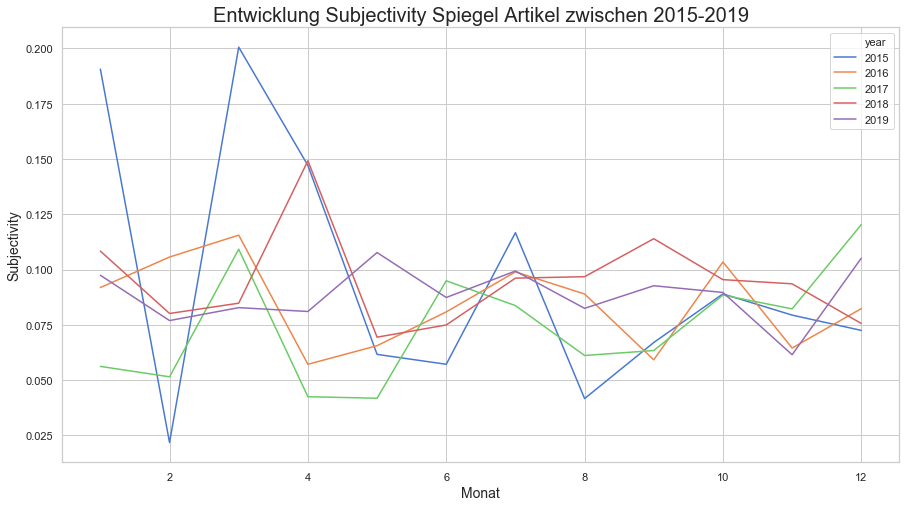

In [160]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='subjectivity', hue='year', palette=color, data=entw_s)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Subjectivity', size=14)
axes.set_title('Entwicklung Subjectivity Spiegel Artikel zwischen 2015-2019', size=20)

In [173]:
# Entwicklung Anzahl Kommentare pro Jahr/Monat
entw_k = df_spiegel.groupby(['year','month'])['thread_counts'].sum()
entw_k

year  month
2015  1          211
      2          598
      3            0
      4          218
      5          113
      6           83
      7          255
      8          444
      9          823
      10         653
      11        1219
      12        1360
2016  1          334
      2          503
      3         1495
      4          874
      5          639
      6          332
      7          248
      8         1507
      9          949
      10        1463
      11         895
      12         200
2017  1         1418
      2         1938
      3         1150
      4          472
      5          910
      6          346
      7          808
      8          796
      9          697
      10         977
      11        1990
      12         630
2018  1          460
      2          539
      3          659
      4          158
      5          539
      6          710
      7          651
      8         1301
      9         1581
      10         686
      11         691
 

In [164]:
entw_k = pd.DataFrame(entw_k)
entw_k.reset_index(inplace=True)

Text(0.5, 1.0, 'Entwicklung Anzahl Kommentare der Spiegel Artikel zwischen 2015-2019')

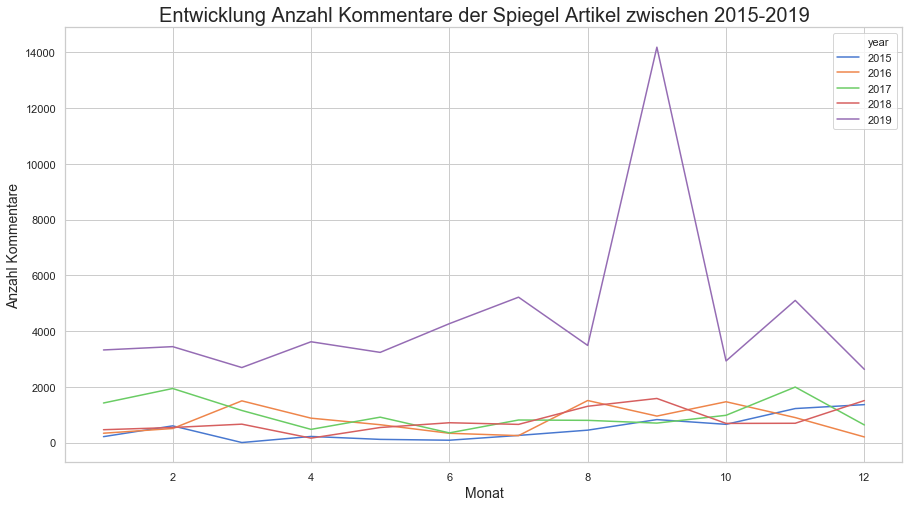

In [165]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='thread_counts', hue='year', palette=color, data=entw_k)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Kommentare', size=14)
axes.set_title('Entwicklung Anzahl Kommentare der Spiegel Artikel zwischen 2015-2019', size=20)


In [66]:
# Anzahl Artikel Spiegel
grouped = df_spiegel.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2015,46042,127,3381,667.275362,587
2016,51220,117,1151,517.373737,476
2017,82540,124,1461,529.102564,464
2018,78060,124,1676,578.222222,489
2019,244189,57,2210,602.935802,512


Text(0.5, 1.0, 'Verteilung Lesbarkeitsindex Spiegel Artikel')

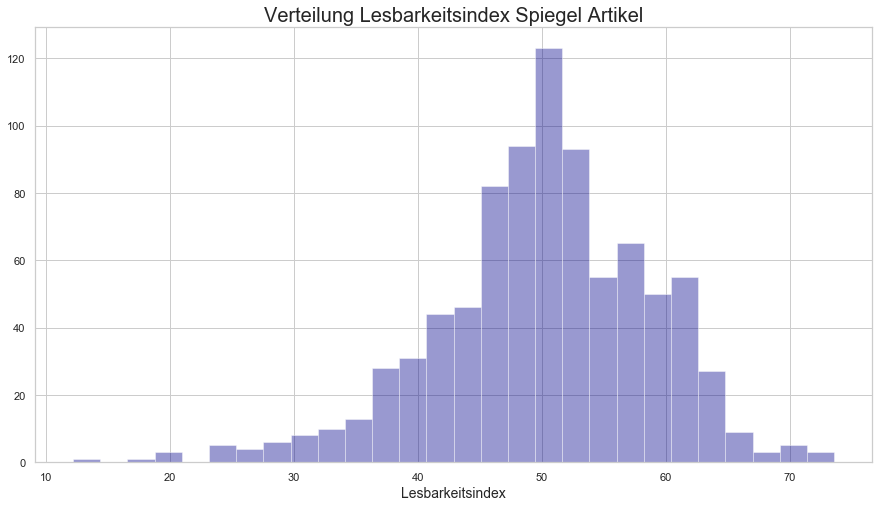

In [167]:
## Verteilung Variablen Spiegel, Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity, Anzahl Kommentare dargestellt mit distplots
# Entwicklung Lesbarkeit Spiegel

fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.lesbarkeit.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Lesbarkeitsindex', size=14)
axes.set_title('Verteilung Lesbarkeitsindex Spiegel Artikel', size=20)
#l = sns.distplot(df_spiegel.lesbarkeit.dropna(),color= 'darkblue',kde=False).set_title('Verteilung Lesbarkeitsindex Spiegel Artikel')

Text(0.5, 1.0, 'Verteilung Polarity Spiegel Artikel')

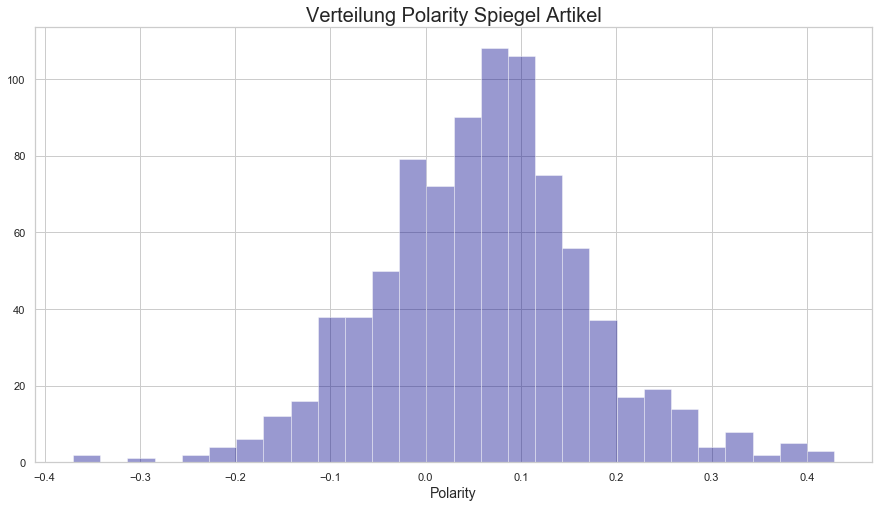

In [169]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.polarity.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Polarity', size=14)
axes.set_title('Verteilung Polarity Spiegel Artikel', size=20)


#p = sns.distplot(df_spiegel.polarity.dropna())

Text(0.5, 1.0, 'Verteilung Subjectivity Spiegel Artikel')

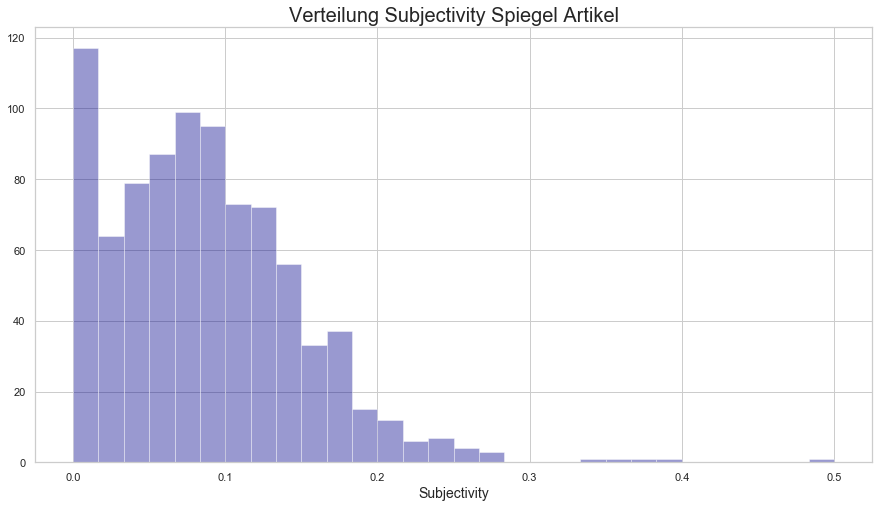

In [170]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.subjectivity.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Subjectivity', size=14)
axes.set_title('Verteilung Subjectivity Spiegel Artikel', size=20)

#p= sns.distplot(df_spiegel.subjectivity.dropna())

Text(0.5, 1.0, 'Verteilung Anzahl Kommentare Spiegel Artikel')

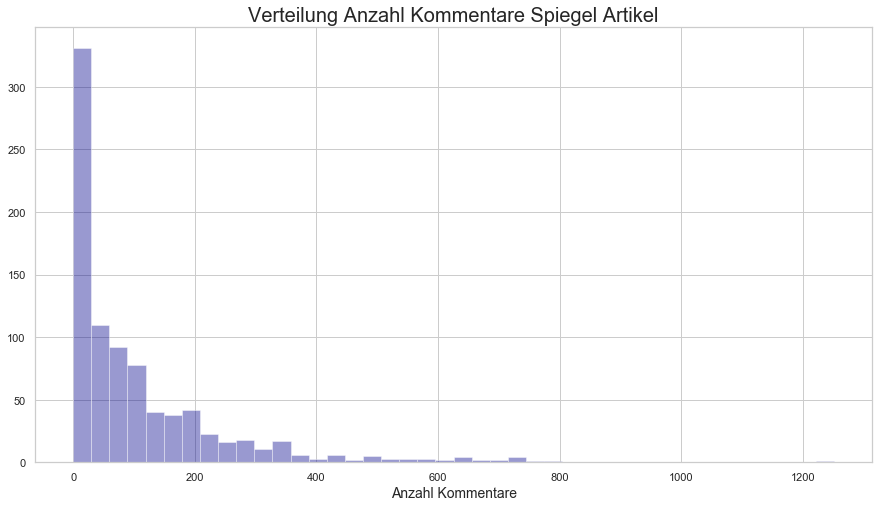

In [171]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.thread_counts.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Anzahl Kommentare', size=14)
axes.set_title('Verteilung Anzahl Kommentare Spiegel Artikel', size=20)

#t = sns.distplot(df_spiegel.thread_counts.dropna())

Text(0.5, 1.0, 'Verteilung Anzahl Wörter Spiegel Artikel')

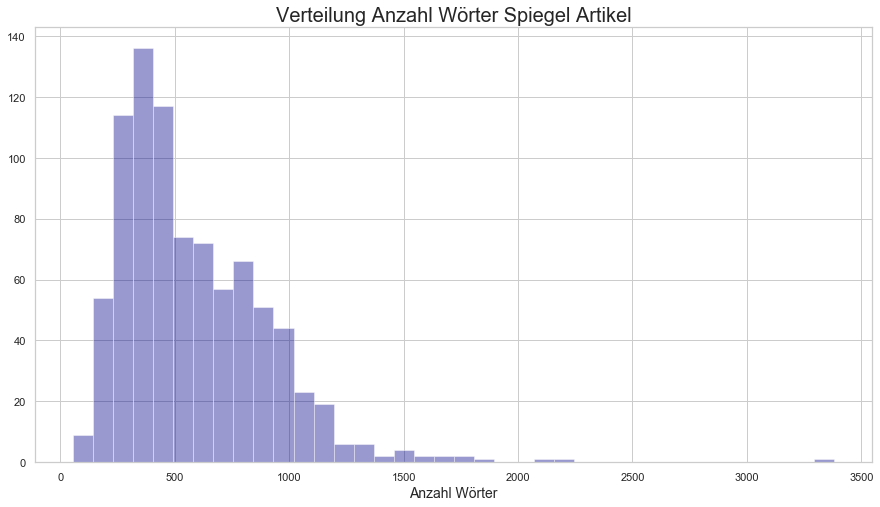

In [185]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.word_counts.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Anzahl Wörter', size=14)
axes.set_title('Verteilung Anzahl Wörter Spiegel Artikel', size=20)

#w = sns.distplot(df_spiegel.word_counts.dropna())

In [175]:
# Anzahl Artikel Bild
grouped_b = df_bild.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped_b.columns = ['_'.join(x) for x in grouped_b.columns]
grouped_b

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2019,30167,26,1037,307.826531,281.5


Text(0.5, 1.0, 'Verteilung Lesbarkeitsindex Bild Artikel')

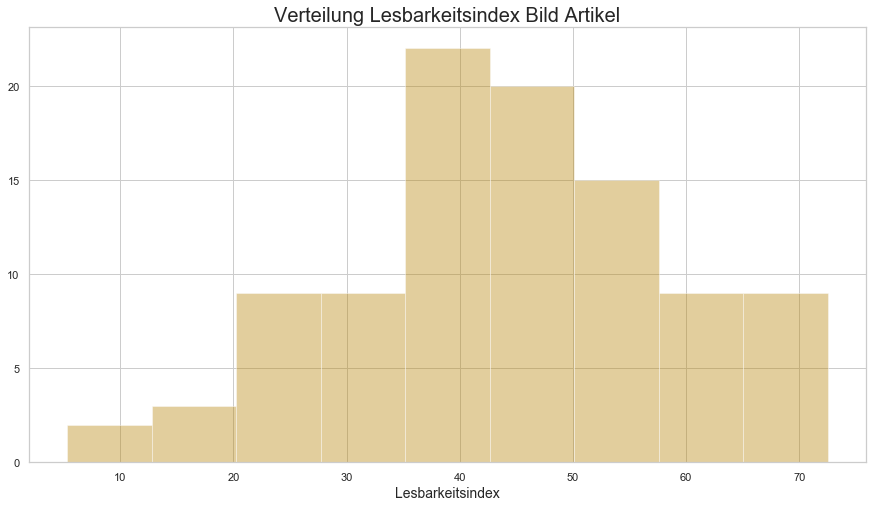

In [188]:
## Verteilung Variablen Bild, Anzahl Artikel, Lesbarkeit, Polarity, Subjectivity, Anzahl Kommentare dargestellt mit distplots
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_bild.lesbarkeit.dropna(),color= 'darkgoldenrod',kde=False)
axes.set_xlabel('Lesbarkeitsindex', size=14)
axes.set_title('Verteilung Lesbarkeitsindex Bild Artikel', size=20)

#l_b = sns.distplot(df_bild.lesbarkeit.dropna())

Text(0.5, 1.0, 'Verteilung Polarity Bild Artikel')

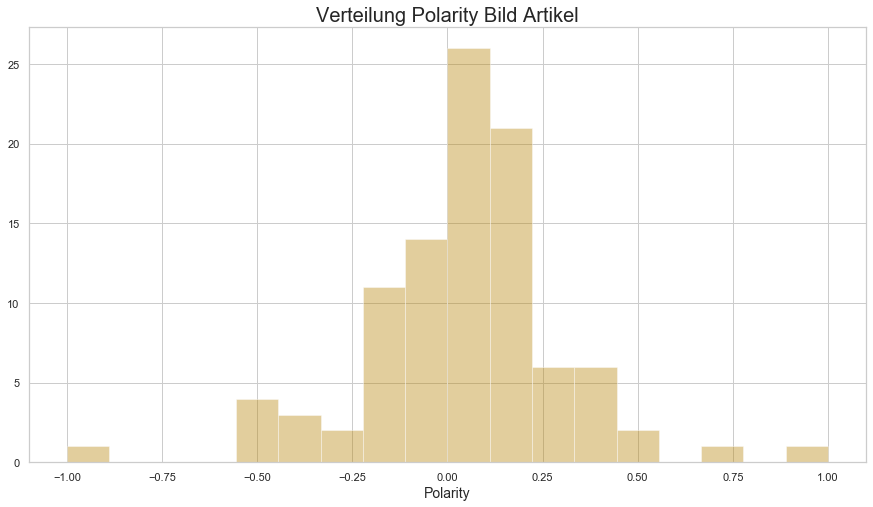

In [189]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_bild.polarity.dropna(),color= 'darkgoldenrod',kde=False)
axes.set_xlabel('Polarity', size=14)
axes.set_title('Verteilung Polarity Bild Artikel', size=20)

#p_b = sns.distplot(df_bild.polarity.dropna())

Text(0.5, 1.0, 'Verteilung Subjectivity Bild Artikel')

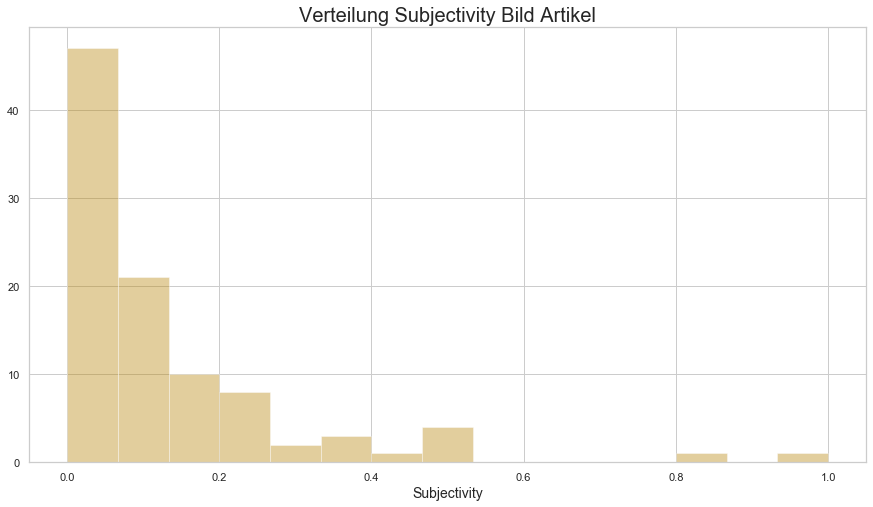

In [190]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_bild.subjectivity.dropna(),color= 'darkgoldenrod',kde=False)
axes.set_xlabel('Subjectivity', size=14)
axes.set_title('Verteilung Subjectivity Bild Artikel', size=20)

#s_b = sns.distplot(df_bild.subjectivity.dropna())

In [0]:
ax = sns.boxplot(x="month", y="word_counts", data=df_bild)

In [200]:
# Jointplot zw. polarity und Anzahl Kommentare (dieselbe Ausertung mit 3 unterschiedlichen Visualisierungen: kind: scatter/hex/kde)

#fig = plt.figure(figsize=(15, 8))
#axes = fig.add_subplot(111)
#sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='scatter')
#axes.set_xlabel('Polarity', size=14)
#axes.set_ylabel('Anzahl Kommentare', size=14)
#axes.set_title('Jointplot Spiegel zw. Polarity und Anzahl Kommentare', size=20)


sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='scatter') #.set_title('Relation zwischen Polarity und Anzahl Kommentare') 'JointGrid' object has no attribute 'set_title'

AttributeError: 'JointGrid' object has no attribute 'set_title'

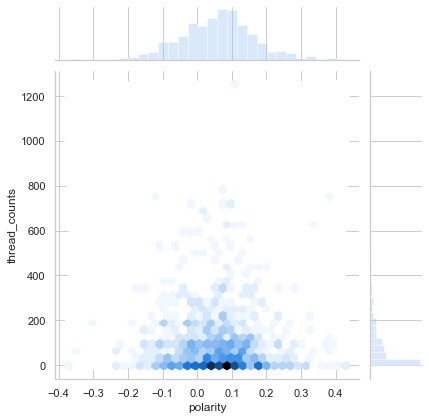

In [192]:
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='hex')

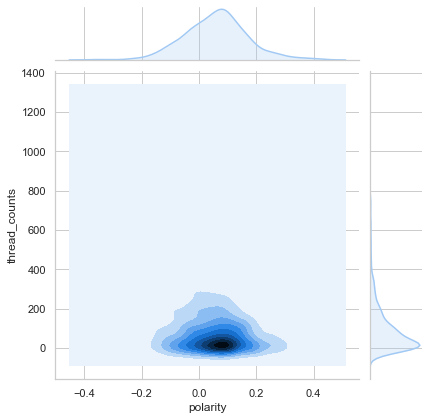

In [193]:
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='kde')

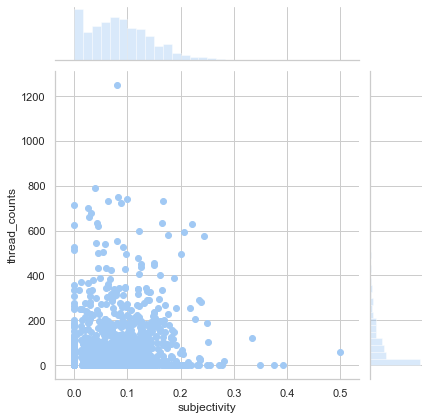

In [194]:
# Jointplot zw. subjectivity und Anzahl Kommentare (dieselbe Ausertung mit 3 unterschiedlichen Visualisierungen: kind: scatter/hex/kde)
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='scatter')

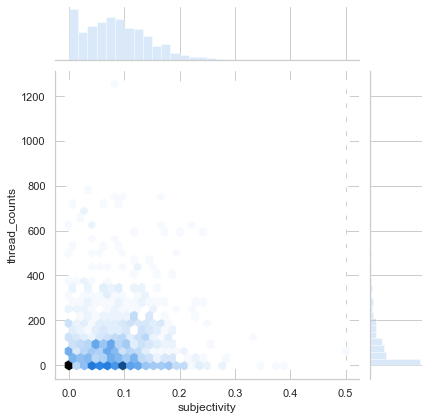

In [201]:
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='hex')

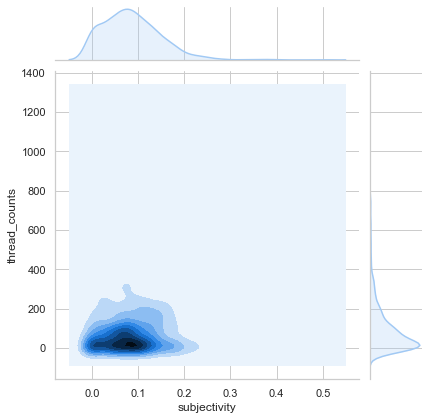

In [203]:
sns.jointplot(x='subjectivity', y='thread_counts', data=df_spiegel, kind='kde')

In [108]:
df_comments

,mean_comment_pol,min_comment_pol,max_comment_pol,median_comment_pol,mean_comment_subj,min_comment_subj,max_comment_subj,median_comment_subj
Id,,,,,,,,
article_10p0.txt,0.089066,-1.000000,1.000000,0.065196,0.097572,0.0,1.000000,0.000000
article_10p1.txt,0.072774,-1.000000,1.000000,0.000000,0.096466,0.0,1.000000,0.000000
article_10p2.txt,0.058812,-1.000000,1.000000,0.038889,0.122138,0.0,1.000000,0.000000
article_10p3.txt,0.074193,-1.000000,0.900000,0.070000,0.119300,0.0,1.000000,0.000000
article_10p4.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
article_10p5.txt,0.145620,-1.000000,1.000000,0.060000,0.073718,0.0,1.000000,0.000000
article_10p6.txt,-0.007041,-1.000000,1.000000,0.000000,0.086276,0.0,1.000000,0.000000
article_10p7.txt,0.093548,-1.000000,1.000000,0.000000,0.089205,0.0,1.000000,0.000000
article_10p8.txt,0.231102,-0.560000,1.000000,0.151136,0.072022,0.0,0.426667,0.000000
